In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('datasets/responses.csv')

In [3]:
data.head(2).T

,0,1
Music,5.0,4.0
Slow songs or fast songs,3.0,4.0
Dance,2.0,2.0
Folk,1.0,1.0
Country,2.0,1.0
...,...,...
Left - right handed,right handed,right handed
Education,college/bachelor degree,college/bachelor degree
Only child,no,no
Village - town,village,city


In [4]:
data = data[['Happiness in life', 'Age', 'Height', 'Gender', 'Weight',
            'Left - right handed', 'Village - town', 'Getting up', 'God',
            'Health','Borrowed stuff', 'Self-criticism', 'Elections',
            'Smoking', 'Alcohol', 'Number of friends', 'Spending on healthy eating',
            'Music', 'Movies', 'Friends versus money', 'Changing the past']]

In [5]:
data.shape

(1010, 21)

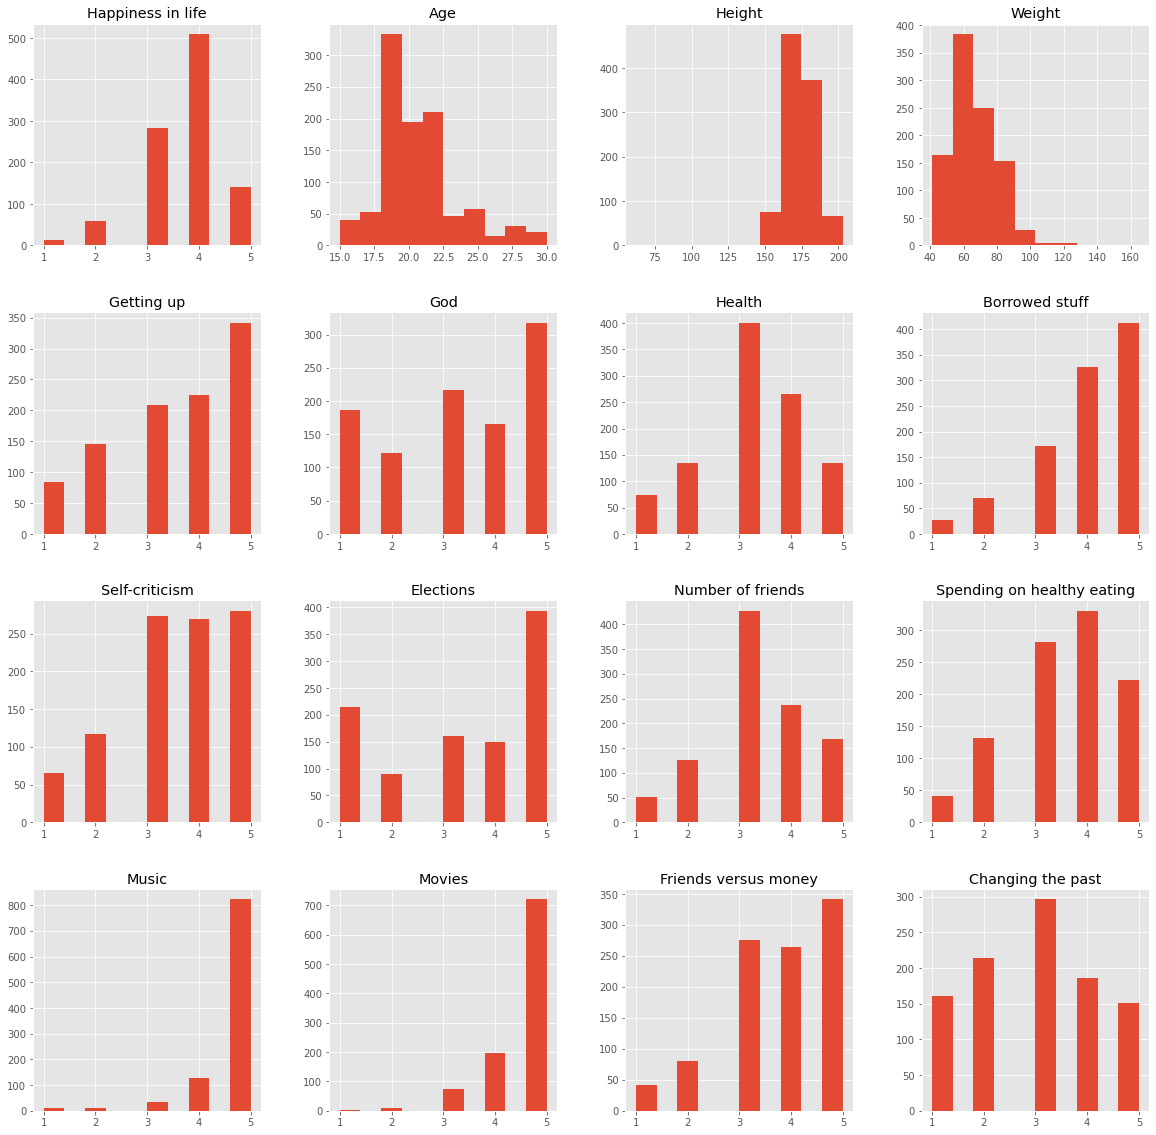

In [6]:
data.hist(figsize=(20, 20));

In [7]:
numerical = ['Age', 'Height', 'Weight']
target = ['Happiness in life']
categorical = [col for col in data.columns if col not in numerical + target]

In [8]:
 data[categorical]

,Gender,Left - right handed,Village - town,Getting up,God,Health,Borrowed stuff,Self-criticism,Elections,Smoking,Alcohol,Number of friends,Spending on healthy eating,Music,Movies,Friends versus money,Changing the past
0,female,right handed,village,2.0,1.0,1.0,4.0,1.0,4.0,never smoked,drink a lot,3,3.0,5.0,5.0,3.0,1.0
1,female,right handed,city,5.0,1.0,4.0,3.0,4.0,5.0,never smoked,drink a lot,3,2.0,4.0,5.0,4.0,4.0
2,female,right handed,city,4.0,5.0,2.0,2.0,4.0,5.0,tried smoking,drink a lot,3,2.0,5.0,5.0,5.0,5.0
3,female,right handed,city,1.0,4.0,1.0,5.0,5.0,5.0,former smoker,drink a lot,1,1.0,5.0,5.0,2.0,5.0
4,female,right handed,village,4.0,5.0,3.0,4.0,5.0,5.0,tried smoking,social drinker,3,4.0,5.0,5.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,female,right handed,city,5.0,3.0,4.0,3.0,2.0,5.0,current smoker,drink a lot,3,4.0,5.0,5.0,4.0,1.0
1006,male,left handed,village,1.0,5.0,3.0,4.0,5.0,5.0,never smoked,social drinker,3,3.0,4.0,5.0,2.0,4.0
1007,female,right handed,city,5.0,1.0,3.0,4.0,5.0,5.0,tried smoking,social drinker,1,5.0,4.0,4.0,4.0,5.0
1008,female,right handed,city,5.0,2.0,4.0,5.0,3.0,5.0,tried smoking,social drinker,3,3.0,5.0,5.0,3.0,3.0


In [9]:
to_dummies = ['Gender',
              'Left - right handed',
              'Village - town',
              'Smoking',
              'Alcohol']

In [10]:
data_preprocessed = pd.get_dummies(data, columns=to_dummies, drop_first=True)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

staler = StandardScaler()

In [12]:
data_preprocessed.isnull().sum()/len(data_preprocessed)*100

Happiness in life                   0.396040
Age                                 0.693069
Height                              1.980198
Weight                              1.980198
Getting up                          0.495050
God                                 0.198020
Health                              0.099010
Borrowed stuff                      0.198020
Self-criticism                      0.495050
Elections                           0.297030
Number of friends                   0.000000
Spending on healthy eating          0.198020
Music                               0.297030
Movies                              0.594059
Friends versus money                0.594059
Changing the past                   0.198020
Gender_male                         0.000000
Left - right handed_right handed    0.000000
Village - town_village              0.000000
Smoking_former smoker               0.000000
Smoking_never smoked                0.000000
Smoking_tried smoking               0.000000
Alcohol_ne

In [13]:
data_preprocessed.dropna(inplace=True)

In [14]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def quality_report(prediction, actual):
    print(f'Accuracy: {accuracy_score(prediction, actual):.3f}\nPrecision: {precision_score(prediction, actual):.3f} \nRecall: {recall_score(prediction, actual):.3f}\nf1_score: {f1_score(prediction, actual):.3f}')

    
X_train, X_test, y_train, y_test = train_test_split(
    data_preprocessed.drop(target, axis=1),
    data_preprocessed[target],
    test_size = 0.20,
    random_state = 42,
    stratify=data_preprocessed[target]
)
# стандартизируем
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train[numerical])
X_test_scaled = scaler.fit_transform(X_test[numerical])

In [16]:
X_train[numerical] = X_train_scaled
X_test[numerical] = X_test_scaled

In [17]:
X_train.head()

,Age,Height,Weight,Getting up,God,Health,Borrowed stuff,Self-criticism,Elections,Number of friends,...,Friends versus money,Changing the past,Gender_male,Left - right handed_right handed,Village - town_village,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking,Alcohol_never,Alcohol_social drinker
727,-0.505795,0.158823,1.002697,4.0,1.0,3.0,5.0,3.0,1.0,4,...,1.0,1.0,1,0,1,0,0,1,1,0
377,-1.220360,-1.482092,0.274114,5.0,3.0,3.0,5.0,5.0,1.0,2,...,3.0,4.0,0,1,1,0,1,0,0,1
632,-1.220360,0.448396,1.002697,3.0,2.0,2.0,4.0,3.0,1.0,3,...,4.0,2.0,1,1,1,0,1,0,1,0
335,-1.220360,1.124067,0.492689,2.0,5.0,4.0,5.0,4.0,3.0,3,...,5.0,4.0,1,1,0,0,0,1,0,1
437,-0.863078,-0.999470,-0.818761,5.0,2.0,4.0,5.0,5.0,3.0,3,...,2.0,3.0,0,1,0,1,0,0,0,1


In [18]:
y_train['Happiness in life'].value_counts(normalize=True)

4.0    0.505976
3.0    0.280212
5.0    0.140770
2.0    0.059761
1.0    0.013280
Name: Happiness in life, dtype: float64

In [19]:
y_naive_pred = np.random.choice(
    [4., 3., 5., 2., 1.],
    len(y_test),
    p=y_train['Happiness in life'].value_counts(normalize=True).values)

<AxesSubplot:>

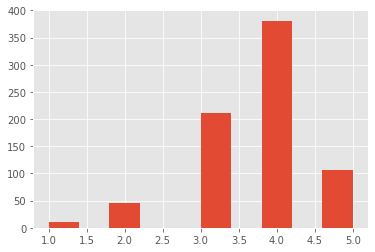

In [20]:
y_train['Happiness in life'].hist()

(array([ 5.,  0.,  6.,  0.,  0., 63.,  0., 88.,  0., 27.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

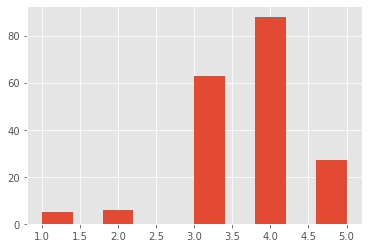

In [21]:
plt.hist(y_naive_pred)

In [22]:
print(classification_report(y_test, y_naive_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.17      0.09      0.12        11
         3.0       0.27      0.32      0.29        53
         4.0       0.56      0.51      0.53        96
         5.0       0.19      0.19      0.19        27

    accuracy                           0.38       189
   macro avg       0.24      0.22      0.23       189
weighted avg       0.39      0.38      0.39       189



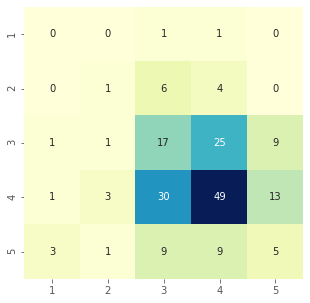

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_naive_pred)

conf_matrix = pd.DataFrame(data=cm, index=range(1, 6), columns=range(1,6))
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False);

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        11
         3.0       0.39      0.32      0.35        53
         4.0       0.57      0.77      0.65        96
         5.0       0.80      0.30      0.43        27

    accuracy                           0.52       189
   macro avg       0.35      0.28      0.29       189
weighted avg       0.51      0.52      0.49       189



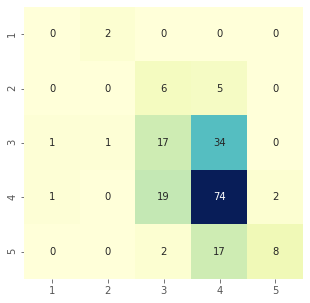

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, log_reg.predict(X_test))
conf_matrix = pd.DataFrame(data=cm, index=range(1, 6), columns=range(1,6))
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False);

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        11
         3.0       0.39      0.30      0.34        53
         4.0       0.57      0.80      0.66        96
         5.0       0.78      0.26      0.39        27

    accuracy                           0.53       189
   macro avg       0.35      0.27      0.28       189
weighted avg       0.51      0.53      0.49       189



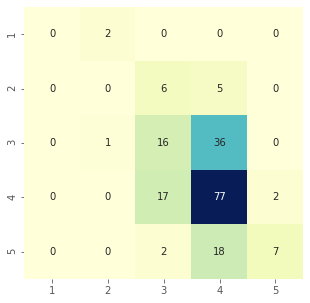

In [39]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

sfk =  StratifiedKFold(n_splits=5)

logit_cv = LogisticRegressionCV(cv=sfk, solver='lbfgs')

logit_cv.fit(X_train, y_train)

print(classification_report(y_test, logit_cv.predict(X_test)))
cm = confusion_matrix(y_test, logit_cv.predict(X_test))
conf_matrix = pd.DataFrame(data=cm, index=range(1, 6), columns=range(1,6))
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False);

              precision    recall  f1-score   support

         1.0       0.09      0.50      0.15         2
         2.0       0.18      0.55      0.27        11
         3.0       0.36      0.38      0.37        53
         4.0       0.61      0.26      0.36        96
         5.0       0.33      0.59      0.43        27

    accuracy                           0.36       189
   macro avg       0.31      0.46      0.32       189
weighted avg       0.47      0.36      0.37       189



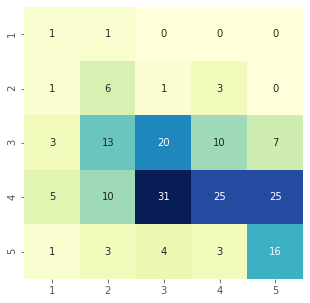

In [38]:
log_reg = LogisticRegression(class_weight='balanced')

log_reg.fit(X_train, y_train)
print(classification_report(y_test, log_reg.predict(X_test)))
cm = confusion_matrix(y_test, log_reg.predict(X_test))
conf_matrix = pd.DataFrame(data=cm, index=range(1, 6), columns=range(1,6))
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False);

In [42]:
log_reg.coef_[0, :]

array([-1.39188091, -0.8209827 , -0.76556809,  0.70620626, -0.46414493,
       -1.35422021,  0.73390093,  0.33073581, -0.83642928, -0.75868106,
       -0.79825115, -1.01052865, -0.32044599,  0.4398675 ,  1.47484394,
        2.05319796,  0.33493083,  1.56062541,  2.13880738, -0.66420042,
       -2.44219788, -0.52772322, -0.08209268])

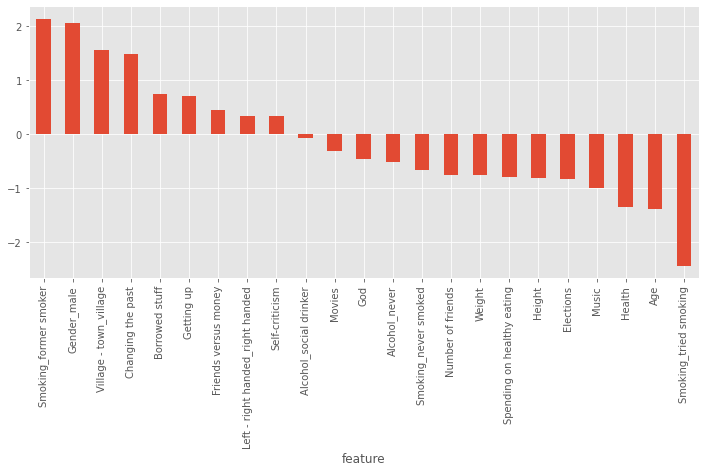

In [44]:
featureImportance = pd.DataFrame({'feature': X_train.columns, 
                                  'importance': log_reg.coef_[0, :]})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].head(30).plot(kind='bar', figsize=(12, 5));
featureImportance['importance'].tail(30).plot(kind='bar', figsize=(12, 5));
# featureImportance['importance'].plot(kind='bar', figsize=(15, 7));

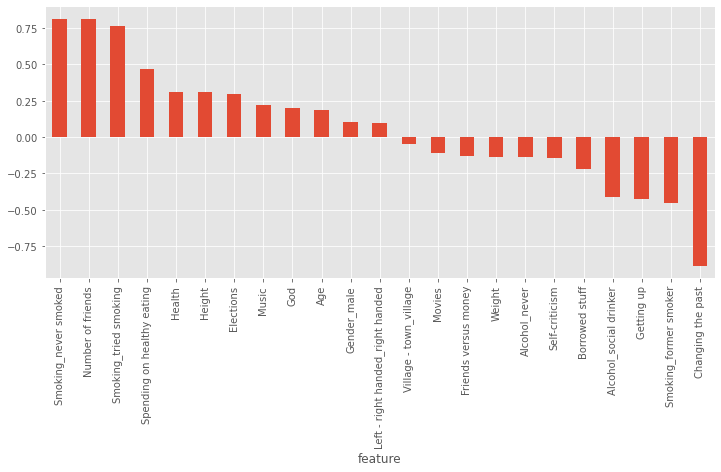

In [45]:
featureImportance = pd.DataFrame({'feature': X_train.columns, 
                                  'importance': log_reg.coef_[4, :]})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].head(30).plot(kind='bar', figsize=(12, 5));
featureImportance['importance'].tail(30).plot(kind='bar', figsize=(12, 5));
# featureImportance['importance'].plot(kind='bar', figsize=(15, 7));